In [116]:
from keras import layers
from keras import regularizers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from sklearn.model_selection import train_test_split
import random
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras.initializers import glorot_uniform
from matplotlib.pyplot import imshow
import pandas as pd
import os
import cv2
import tensorflow as tf
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

C:\Users\adarabi3\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [117]:
X = pd.read_csv("freq_new.csv")
Y= pd.read_csv("out_50.csv")
X_data = X.to_numpy()
Y_data = Y.to_numpy()
print(X_data.shape)
print(Y_data.shape)

(5000, 50)
(5000, 2500)


In [88]:
def convert_to_one_hot(Y):
    n_values = np.max(Y)+1
    return np.squeeze(np.eye(n_values)[Y.reshape(-1)])

In [89]:
# X_final=convert_to_one_hot(X_data)
# print(X_final.shape)
# print(Y_data[-1])

In [118]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.15, random_state=42)
# x_train=X_data[0:4000]
# x_test=X_data[4000:5001]
# y_train=Y_data[0:4000]
# y_test=Y_data[4000:5001]
y_train=y_train/10
y_test=y_test/10
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4250, 50)
(750, 50)
(4250, 2500)
(750, 2500)


In [98]:
def DeepNet(input_shape = 50, classes=[1,1,1,1]):

    X_input = Input(input_shape)

    C1,C2,C3,C4=classes
    
    X = Dense(C1, activation='sigmoid', name='fc1' + str(C1), kernel_initializer = glorot_uniform(seed=0))(X_input)#,kernel_regularizer=tf.keras.regularizers.l1(0.1))(X)
    X = Dense(C2, activation='sigmoid', name='fc2' + str(C2))(X)
    X = Dense(C3, activation='sigmoid', name='fc3' + str(C3))(X)
    # X = Dense(C4, activation='sigmoid', name='fc4' + str(C4))(X)
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='DeepNet')

    return model

In [104]:
model = DeepNet(input_shape = 50, classes = [50,250,1000,2500])

In [105]:
# model.compile(optimizer='ADAM', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredLogarithmicError(), metrics=['accuracy'])
# model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
model.summary()

Model: "DeepNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 50)]              0         
                                                                 
 fc150 (Dense)               (None, 50)                2550      
                                                                 
 fc2250 (Dense)              (None, 250)               12750     
                                                                 
 fc31000 (Dense)             (None, 1000)              251000    
                                                                 
 fc42500 (Dense)             (None, 2500)              2502500   
                                                                 
Total params: 2,768,800
Trainable params: 2,768,800
Non-trainable params: 0
_________________________________________________________________


In [119]:
rediction=model.fit(x_train,y_train,epochs=500,batch_size=32)

Epoch 1/500
133/133 [==============================] - 3s 17ms/step - loss: 1.1250e-05 - accuracy: 0.6111
Epoch 2/500
133/133 [==============================] - 2s 18ms/step - loss: 4.6433e-06 - accuracy: 0.6304
Epoch 3/500
133/133 [==============================] - 2s 18ms/step - loss: 3.6903e-06 - accuracy: 0.6398
Epoch 4/500
133/133 [==============================] - 2s 18ms/step - loss: 3.1827e-06 - accuracy: 0.6816
Epoch 5/500
133/133 [==============================] - 2s 18ms/step - loss: 2.8632e-06 - accuracy: 0.7325
Epoch 6/500
133/133 [==============================] - 3s 19ms/step - loss: 2.6462e-06 - accuracy: 0.7426
Epoch 7/500
133/133 [==============================] - 2s 18ms/step - loss: 2.4768e-06 - accuracy: 0.7633
Epoch 8/500
133/133 [==============================] - 2s 18ms/step - loss: 2.4522e-06 - accuracy: 0.7642
Epoch 9/500
133/133 [==============================] - 2s 18ms/step - loss: 2.2573e-06 - accuracy: 0.7802
Epoch 10/500
133/133 [========================

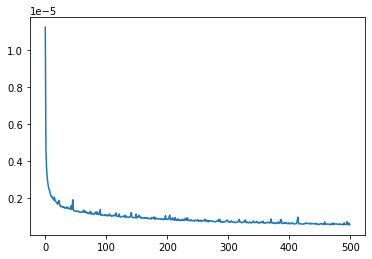

In [122]:
plt.plot(rediction.history["loss"])

In [120]:
preds = model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

24/24 [==============================] - 0s 4ms/step - loss: 7.1155e-07 - accuracy: 0.8693
Loss = 7.11547841092397e-07
Test Accuracy = 0.8693333268165588


In [121]:
X_data=x_train[2002]
X_data=X_data.reshape(50,-1).T
print(X_data.shape)
q=model.predict(X_data)
mse = tf.keras.losses.MeanAbsoluteError()
error=mse(q, y_train[2002]).numpy()
print(error)
print(q)
print(y_train[2002])

(1, 50)
0.00022555557370651513
[[0.00614318 0.00538445 0.00450909 ... 0.0232417  0.0224742  0.02179936]]
[0.00647424 0.00582994 0.00458453 ... 0.02328016 0.02255556 0.02178917]
